## Data Pre-Processing

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [65]:
data = pd.read_csv("./dataset/data.csv", low_memory=False)
data.head()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,ad
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


**Evaluate data characteristics: feature min/max values, feature mean values, number of features, null values, unknown values, etc.**

In [66]:
data.shape

(3279, 1559)

In [67]:
data.describe()

,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Since our non-binary features are encoded with string literals instead of integers, we want to convert these columns to integer columns.  This requires dealing with '?' values for observations in which height, width, and/or local values are unknown.**

In [68]:
print(data.height.unique())
print(data.width.unique())
print(data.aratio.unique())
print(data.local.unique())

[' 125' '  57' '  33' '  60' '  59' '   ?' '  90' '  30' '  35' '  72'
 '  50' ' 120' '   2' '  65' '  44' '  80' '  64' '  31' ' 100' '  74'
 '  93' '  21' '  20' '  55' ' 135' '  26' ' 136' ' 124' '  52' '  45'
 ' 165' '  25' ' 105' '  88' '  73' '  43' ' 477' '  70' '  40' ' 240'
 '  51' '  68' ' 171' '  71' '  29' '  38' '  36' '  46' '  12' '  95'
 '  41' '  96' '  16' ' 150' ' 159' ' 110' ' 161' '  15' ' 195' '  11'
 ' 114' ' 160' '  63' ' 134' '  24' '  62' ' 106' ' 200' '  39' ' 115'
 '  75' '  10' ' 207' '  32' '  27' '  48' ' 107' '  28' '  23' '  54'
 ' 102' ' 149' ' 119' '  76' '  79' ' 158' ' 154' '   8' ' 153' '  83'
 ' 174' ' 156' ' 128' '  14' ' 172' ' 104' ' 146' '  98' ' 144' ' 175'
 ' 116' ' 145' '  99' ' 220' ' 185' '  34' ' 239' ' 140' ' 262' ' 142'
 ' 191' '  22' '  87' ' 257' '  66' ' 108' ' 359' '  85' ' 132' ' 237'
 ' 131' '  58' '  78' ' 212' '  18' ' 123' '  92' ' 148' '  84' ' 133'
 ' 152' '  69' '  94' '  82' ' 214' '  49' '  61' '  89' '  56' ' 193'
 '  77

## Feature Imputing

**We want to find out how many of the observations have unknown values to determine how to drop or impute them appropriately.**

In [69]:
valid_height = pd.to_numeric(data.height[data.height != '   ?'])
valid_width = pd.to_numeric(data.width[data.width != '   ?'])
valid_local = pd.to_numeric(data.local[data.local != '?'])
valid_aratio = pd.to_numeric(data.aratio[data.aratio != '     ?'])

invalid_height = data.height[data.height == '   ?']
invalid_width = data.width[data.width == '   ?']
invalid_local = data.local[data.local == '?']
invalid_aratio = data.aratio[data.aratio == '     ?']

print("Number of entries with unknown height: "+str(len(invalid_height))+" out of 3279 ("+str(round(100*len(invalid_height)/3279, 2))+"%)")
print("Number of entries with unknown width: "+str(len(invalid_width))+" out of 3279 ("+str(round(100*len(invalid_width)/3279, 2))+"%)")
print("Number of entries with unknown local: "+str(len(invalid_local))+" out of 3279 ("+str(round(100*len(invalid_local)/3279, 2))+"%)")
print("Number of entries with unknown aratio: "+str(len(invalid_aratio))+" out of 3279 ("+str(round(100*len(invalid_aratio)/3279, 2))+"%)")

Number of entries with unknown height: 903 out of 3279 (27.54%)
Number of entries with unknown width: 901 out of 3279 (27.48%)
Number of entries with unknown local: 15 out of 3279 (0.46%)
Number of entries with unknown aratio: 910 out of 3279 (27.75%)


**Since there are a significant amount of entries missing height, width, and aratio data, we do not want to drop all observations missing these features.  We will instead impute them with the mean value of the respective columns to preserve more of our data.**

**By contrast, the 'local' variable has invalid values for less than 1% of entries, so we will simply drop them, as we do not want to impute using mean values for a binary variable, and we will not lose much of our data.**

In [70]:
height_mean = int(valid_height.mean())
width_mean = int(valid_width.mean())
aratio_mean = int(valid_aratio.mean())
height_mean, width_mean, aratio_mean

(64, 155, 3)

**Impute height and width unknowns with mean values, and drop unknown local values**

In [71]:
data.height[data.height == '   ?'] = height_mean
data.width[data.width == '   ?'] = width_mean
data.aratio[data.aratio == '     ?'] = aratio_mean
data = data[data.local != '   ?']
data = data[data.local != '?']

/tmp/ipykernel_587197/331976387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.height[data.height == '   ?'] = height_mean
/tmp/ipykernel_587197/331976387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.width[data.width == '   ?'] = width_mean
/tmp/ipykernel_587197/331976387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.aratio[data.aratio == '     ?'] = aratio_mean


## Feature Encoding

**Encode ad/non-ad label as binary label**

In [72]:
data.ad.unique()

array(['ad.', 'nonad.'], dtype=object)

In [73]:
data['is_ad'] = data.ad == 'ad.'
data = data.drop(columns = 'ad')

**Convert imputed df to numeric formatting**

In [74]:
data = data.apply(pd.to_numeric)

**Visualize non-binary variable distribution between ads and non-ads**

In [75]:
pair = data[['height', 'width', 'aratio', 'is_ad']]
hist = data[['aratio', 'is_ad']]

In [76]:
pair.head()

,height,width,aratio,is_ad
0,125,125,1.0000,True
1,57,468,8.2105,True
2,33,230,6.9696,True
3,60,468,7.8000,True
4,60,468,7.8000,True


In [77]:
hist.head()

,aratio,is_ad
0,1.0000,True
1,8.2105,True
2,6.9696,True
3,7.8000,True
4,7.8000,True


## Data Visualization

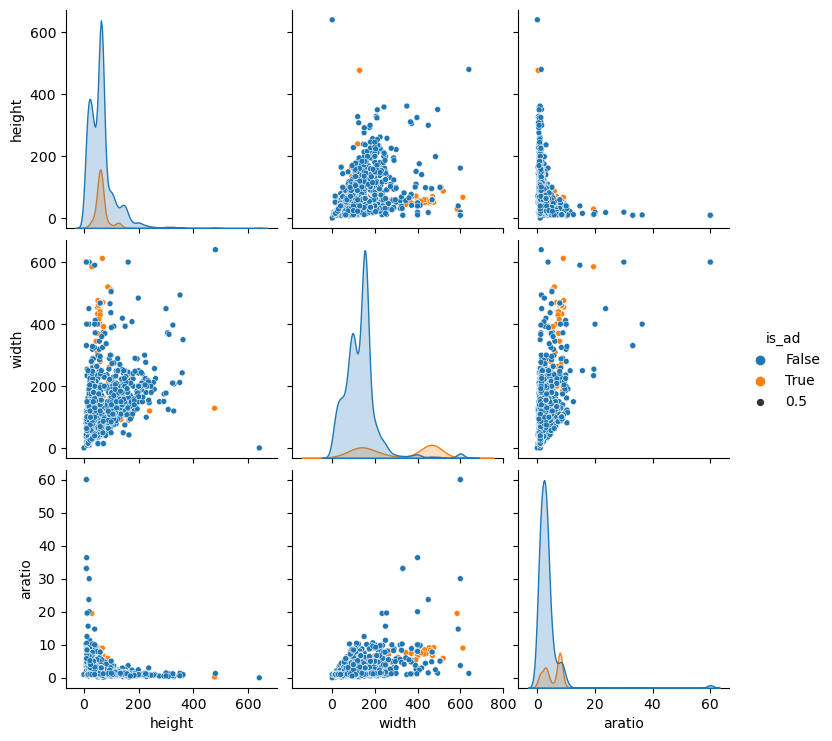

In [78]:
sns.pairplot(pair, hue='is_ad', plot_kws=dict(size=0.5))

**Note the different, non-normally distributed aspect ratio of ads, compared to the relatively normal distribution of non-ads**

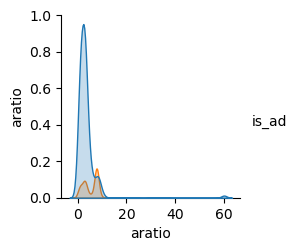

In [79]:
sns.pairplot(hist, hue='is_ad', plot_kws=dict(size=0.5))

<AxesSubplot: >

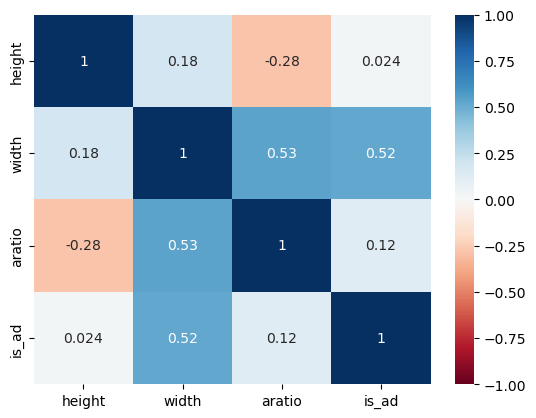

In [80]:
corr = pair.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu')

**Image width is highly correlated with ad/non-ad classification, so we will implement this feature in future model generation**

## Data splitting and scaling

**Since our continuous variables are not normally distributed, we do not want to implement standardization.  Instead, we will use a min-max scaler to scale our features, excluding those which are binary-encoded.**

In [81]:
train, test = train_test_split(data, test_size=0.2, random_state=1)
X_train, y_train = train.drop(columns=['is_ad']), train['is_ad']
X_test, y_test = test.drop(columns=['is_ad']), test['is_ad']

In [82]:
X_train[0:2], y_train[0:2]

/tmp/ipykernel_587197/14980002.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train[0:2], y_train[0:2]


(      height  width  aratio  local  url*images+buttons  url*likesbooks.com  \
 2700      40     70  1.7500      1                   0                   0   
 1399      49     96  1.9591      0                   0                   0   
 
       url*www.slake.com  url*hydrogeologist  url*oso  url*media  ...  \
 2700                  0                   0        0          0  ...   
 1399                  0                   0        0          0  ...   
 
       caption*of  caption*home  caption*my  caption*your  caption*in  \
 2700           0             0           0             0           0   
 1399           0             0           0             0           0   
 
       caption*bytes  caption*here  caption*click  caption*for  caption*you  
 2700              0             0              0            0            0  
 1399              0             0              0            0            0  
 
 [2 rows x 1558 columns],
 2700    False
 1399    False
 Name: is_ad, dtype: bool)

**The we will implement min/max scaling on our X values**

In [83]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.fit_transform(X_test)

In [84]:
X_train_mm[0:5], X_test_mm[0:5]

(array([[0.06103286, 0.10798122, 0.0291424 , ..., 0.        , 0.        ,
         0.        ],
        [0.07511737, 0.1486698 , 0.03262748, ..., 0.        , 0.        ,
         0.        ],
        [0.20500782, 0.20187793, 0.01638874, ..., 0.        , 0.        ,
         0.        ],
        [0.09859155, 0.24100156, 0.04997625, ..., 0.        , 0.        ,
         0.        ],
        [0.0172144 , 0.08763693, 0.07914365, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.11563169, 0.24576271, 0.04585583, ..., 0.        , 0.        ,
         0.        ],
        [0.03640257, 0.35254237, 0.1307914 , ..., 0.        , 0.        ,
         0.        ],
        [0.10706638, 0.37966102, 0.06092127, ..., 0.        , 0.        ,
         0.        ],
        [0.02997859, 0.18644068, 0.07933458, ..., 0.        , 0.        ,
         0.        ],
        [0.11563169, 0.24576271, 0.04585583, ..., 0.        , 0.        ,
         0.        ]]))

## Logistic Regression Model

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [86]:
logreg = LogisticRegression()
logreg.fit(X_train_mm, y_train)

LogisticRegression()

In [87]:
yhat_train = logreg.predict(X_train_mm)
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2252
        True       0.98      0.89      0.93       359

    accuracy                           0.98      2611
   macro avg       0.98      0.94      0.96      2611
weighted avg       0.98      0.98      0.98      2611



In [88]:
yhat_test = logreg.predict(X_test_mm)
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       558
        True       0.99      0.78      0.87        95

    accuracy                           0.97       653
   macro avg       0.98      0.89      0.93       653
weighted avg       0.97      0.97      0.96       653



## Simple Neural Net Model

In [89]:
from keras.models import Sequential
from keras.layers import Dense

2022-12-03 11:57:51.305422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 11:57:52.074733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 11:57:52.074822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 11:57:52.197726: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-03 11:57:55.054975: W tensorflow/stream_executor/platform/de

In [90]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 1558))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid')) # use sigmoid for final classifier unit

2022-12-03 11:58:00.777226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-03 11:58:00.777907: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 11:58:00.778066: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x240): /proc/driver/nvidia/version does not exist
2022-12-03 11:58:00.780809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [91]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [92]:
hist = classifier.fit(X_train_mm.astype(float), y_train, batch_size = 1, epochs = 25, validation_data=(X_test_mm, y_test))

Epoch 1/25
2611/2611 [==============================] - 25s 9ms/step - loss: 0.2764 - accuracy: 0.9138 - val_loss: 0.1985 - val_accuracy: 0.9602
Epoch 2/25
2611/2611 [==============================] - 21s 8ms/step - loss: 0.2167 - accuracy: 0.9655 - val_loss: 0.1786 - val_accuracy: 0.9617
Epoch 3/25
2611/2611 [==============================] - 18s 7ms/step - loss: 0.2127 - accuracy: 0.9667 - val_loss: 0.2092 - val_accuracy: 0.9648
Epoch 4/25
2611/2611 [==============================] - 19s 7ms/step - loss: 0.2124 - accuracy: 0.9701 - val_loss: 0.2146 - val_accuracy: 0.9648
Epoch 5/25
2611/2611 [==============================] - 20s 8ms/step - loss: 0.2132 - accuracy: 0.9724 - val_loss: 0.2237 - val_accuracy: 0.9648
Epoch 6/25
2611/2611 [==============================] - 47s 18ms/step - loss: 0.1947 - accuracy: 0.9724 - val_loss: 0.2042 - val_accuracy: 0.9663
Epoch 7/25
2611/2611 [==============================] - 34s 13ms/step - loss: 0.1819 - accuracy: 0.9770 - val_loss: 0.2228 - val_

**Training Error**

In [93]:
yhat_train = classifier.predict(X_train_mm.astype(float), verbose=False)
yhat_train[0:5]

array([[8.0677273e-06],
       [9.4345302e-07],
       [9.9652109e-09],
       [2.7847078e-08],
       [3.4523102e-16]], dtype=float32)

In [94]:
yhat_train_binary = [ 1 if y>=0.5 else 0 for y in yhat_train ]
yhat_train_binary[0:5]

[0, 0, 0, 0, 0]

In [95]:
print(classification_report(y_train, yhat_train_binary))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2252
        True       0.98      0.89      0.93       359

    accuracy                           0.98      2611
   macro avg       0.98      0.94      0.96      2611
weighted avg       0.98      0.98      0.98      2611



**Testing Error**

In [97]:
yhat_test = classifier.predict(X_test_mm.astype(float), verbose=False)
yhat_test[0:5]

array([[3.1284518e-13],
       [1.8371790e-10],
       [1.0000000e+00],
       [2.0395489e-11],
       [1.0188061e-14]], dtype=float32)

In [98]:
yhat_test_binary = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yhat_test_binary[0:5]

[0, 0, 1, 0, 0]

In [99]:
print(classification_report(y_test, yhat_test_binary))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       558
        True       0.96      0.82      0.89        95

    accuracy                           0.97       653
   macro avg       0.97      0.91      0.93       653
weighted avg       0.97      0.97      0.97       653



**Plot Model Performance**

In [73]:
import matplotlib.pyplot as plt

In [111]:
NN_history = pd.DataFrame(hist.history)
NN_history.rename(
    columns={
        "loss": "train_loss",
        "val_loss": "test_loss",
        "accuracy": "train_accuracy",
        "val_accuracy": "test_accuracy",
        },
    inplace=True,
    )

<AxesSubplot: >

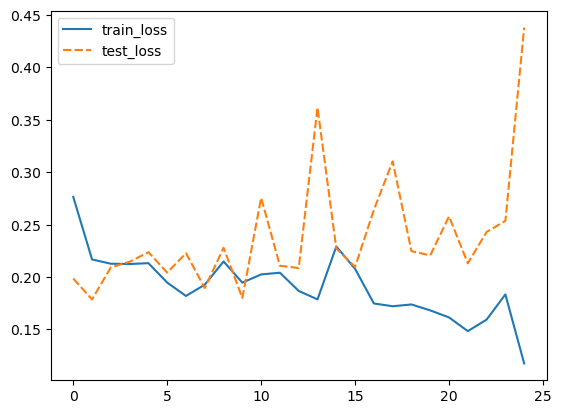

In [113]:
sns.lineplot(NN_history[["train_loss", "test_loss"]])

<AxesSubplot: >

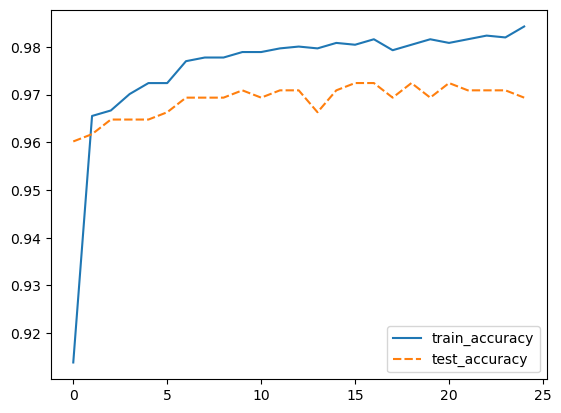

In [114]:
sns.lineplot(NN_history[["train_accuracy", "test_accuracy"]])